<a href="https://colab.research.google.com/github/paulinawdowiak1/ML-Bootcamp/blob/main/supervised/ML_Bootcamp_17_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='1'></a> Wygenerowanie danych

In [2]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# df = df[(df['target'] == 0.0) | (df['target'] == 1.0)]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
data = df.iloc[:, [2, 1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]


### <a name='2'></a> Podział na zbiór treningowy i testowy

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

### <a name='3'></a> Standaryzacja cech

In [15]:
#przy SVM konieczna jest standaryzacja danych
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #zawsze dane treningowe

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### <a name='4'></a> Klasyfikator SVM - linear

In [16]:
from sklearn.svm import SVC
classifier = SVC(C=1.0, kernel='linear')

classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
classifier.score(X_test, y_test)

0.9736842105263158

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


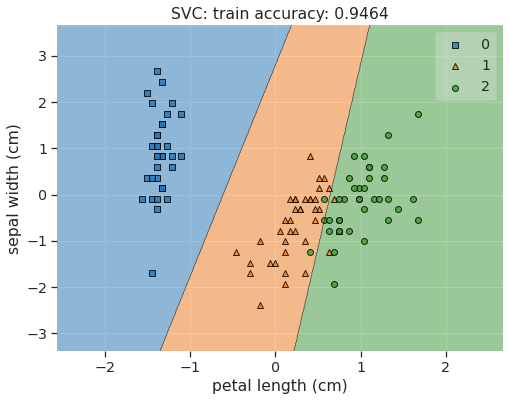

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


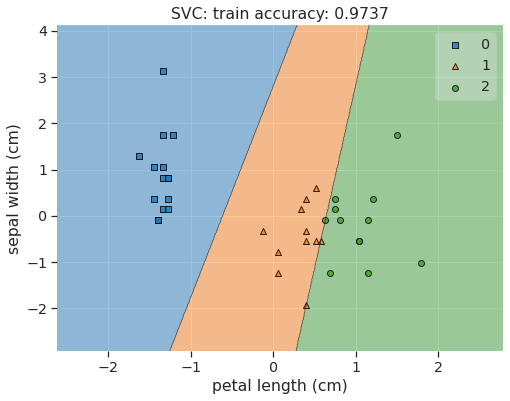

In [19]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='5'></a> Klasyfikator SVM - rbf

In [20]:
classifier = SVC(C=1.0, kernel='rbf')

classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9736842105263158

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


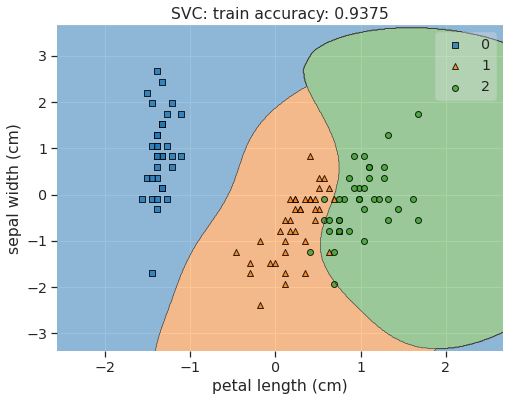

In [21]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


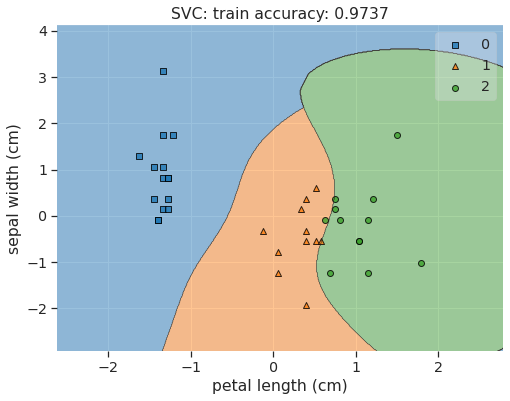

In [22]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: train accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()